### DSC540 Final Project
#### Madison Christiansen

### Milestone 2

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
flatfile = pd.read_csv("/Users/madisonchristiansen/Desktop/boxoffice.csv")
flatfile.head()

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997


In [51]:
## column names 
list(flatfile.columns.values)

['rank', 'title', 'studio', 'lifetime_gross', 'year']

In [52]:
# STEP 1
## For step 1 replacing the columns headers with new ones for a more uniform and clean look. 
##Allows for future transformation of the dataset. 

flatfile = flatfile.rename(columns={'rank': 'Rank', 'title': 'Title', 'studio': 'Studio', 'lifetime_gross': 'LifetimeGross', 'year': 'Year'})
flatfile

,Rank,Title,Studio,LifetimeGross,Year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997
...,...,...,...,...,...
15738,15739,Dog Eat Dog,IFC,80,2009
15739,15740,Paranoid Girls,NaN,78,2015
15740,15741,Confession of a Child of the Century,Cohen,74,2015
15741,15742,Storage 24,Magn.,72,2013


In [56]:
# STEP 2
## Checking for duplicates and making sure the data is not repeated. 
## Checking all coloumns, although the most important columns are rank and title. 

print('Rank Column: {}'.format(any(flatfile.duplicated(subset=['Rank']))))
print('Title Column:{}'.format(any(flatfile.duplicated(subset=['Title'])))) 
print('Studio Column:{}'.format(any(flatfile.duplicated(subset=['Studio']))))
print('Lifetime Gross Column:{}'.format(any(flatfile.duplicated(subset=['LifetimeGross']))))
print('Year Column:{}'.format(any(flatfile.duplicated(subset=['Year']))))

Rank Column: False
Title Column:True
Studio Column:True
Lifetime Gross Column:True
Year Column:True


In [57]:
## Title column has duplicates, checking what they are. 
## The duplicates are remakes of the same movie from different years, this will not impact my data. 
## Keeping the duplicates.

title = flatfile["Title"]
flatfile[title.isin(title[title.duplicated()])].sort_values("Title")

,Rank,Title,Studio,LifetimeGross,Year
11962,11963,After Midnight,Avat.,50469,2004
11328,11329,After Midnight,MGM,76325,1989
1959,1960,Around the World in 80 Days,UA,42000000,1956
3045,3046,Around the World in 80 Days,BV,24008137,2004
12556,12557,Bluebeard,Strand,33490,2010
...,...,...,...,...,...
5496,5497,Water,FoxS,5529144,2006
3243,3244,When a Stranger Calls,Col.,21411158,1979
1729,1730,When a Stranger Calls,SGem,47860214,2006
7713,7714,Whore,Trim.,1008404,1991


In [59]:
# STEP 3
## Checking for NaN values. 
## This gives an idea as to if the data is all usable and if there are any rows that are incomplete.

print("Rank Column: ", flatfile['Rank'].isnull().sum())
print("Title Column:", flatfile['Title'].isnull().sum())
print("Studio Column: ", flatfile['Studio'].isnull().sum())
print("Lifetime Gross Column: ", flatfile['LifetimeGross'].isnull().sum())
print("Year Column: ", flatfile['Year'].isnull().sum())

Rank Column:  0
Title Column: 0
Studio Column:  35
Lifetime Gross Column:  0
Year Column:  0


In [60]:
check_for_nan = flatfile['Studio'].isnull()
print (check_for_nan)
## With the nan values being in the studio column only, I think it wont impact the dataset by keeping these rows.
## This will show us what titles have unknown studios and what their data looks like.

0        False
1        False
2        False
3        False
4        False
         ...  
15738    False
15739     True
15740    False
15741    False
15742    False
Name: Studio, Length: 15743, dtype: bool


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc8bd1e730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc8bd1ecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc8bd1e460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc8bd2c2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc8bd2c580>],
 'means': []}

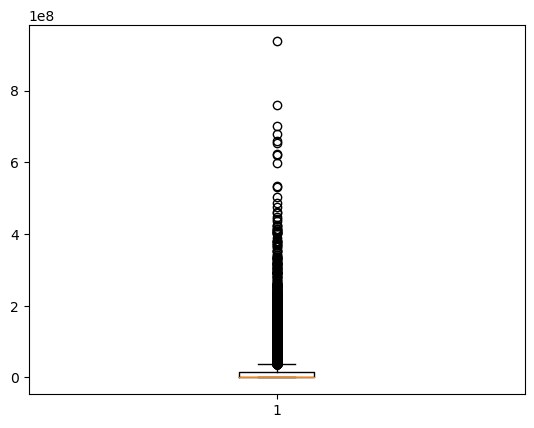

In [63]:
# STEP 4
## Identifying outliers for the different columns.
## Looking at spesifically the lifetime gross and year columns to see if there is bad data within thoes. 

plt.boxplot(flatfile.LifetimeGross)
## The lifetime gross column does not show any significant outliers or bad data. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc382f3550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc382f3af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc382f3280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc383020d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc383023a0>],
 'means': []}

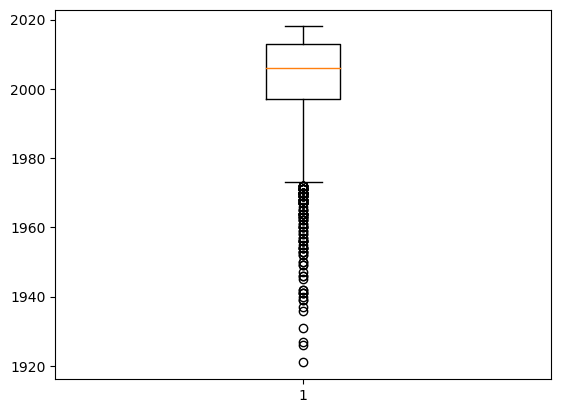

In [64]:
plt.boxplot(flatfile.Year)
## The year column shows outliers although they are not bad data.

In [83]:
# STEP 5 
## Adding a column to label which data is a repeate of the same film from a different year.
def f(flatfile):
    m1 = flatfile.duplicated(['Title'], keep=False)

    flatfile['Duplicate Title'] = np.select([m1],['dup_title'], default='NaD')
    return flatfile

flatfile2 = f(flatfile)

In [85]:
flatfile2 = flatfile2.drop(columns=['DUP'])

In [94]:
## Checking if it worked
print(flatfile2)
print(flatfile2.loc[[3243]])
print(flatfile2.loc[[1729]])

        Rank                                 Title Studio  LifetimeGross  \
0          1          Star Wars: The Force Awakens     BV      936662225   
1          2                                Avatar    Fox      760507625   
2          3                         Black Panther     BV      700059566   
3          4                Avengers: Infinity War     BV      678681680   
4          5                               Titanic   Par.      659363944   
...      ...                                   ...    ...            ...   
15738  15739                           Dog Eat Dog    IFC             80   
15739  15740                        Paranoid Girls    NaN             78   
15740  15741  Confession of a Child of the Century  Cohen             74   
15741  15742                            Storage 24  Magn.             72   
15742  15743                           Zyzzyx Road   Reg.             30   

       Year Duplicate Title  Missing  Missing Studio Data  
0      2015             NaD

In [96]:
# STEP 6
## Adding a column to indicate which row is missing the studio data. 
## 1=not missing 
## 0=missing
flatfile2['Missing Studio Data'] = (~flatfile2['Studio'].isnull()).astype(int)

In [98]:
flatfile2 = flatfile2.drop(columns=['Missing'])

In [99]:
flatfile2.head()

,Rank,Title,Studio,LifetimeGross,Year,Duplicate Title,Missing Studio Data
0,1,Star Wars: The Force Awakens,BV,936662225,2015,NaD,1
1,2,Avatar,Fox,760507625,2009,NaD,1
2,3,Black Panther,BV,700059566,2018,NaD,1
3,4,Avengers: Infinity War,BV,678681680,2018,NaD,1
4,5,Titanic,Par.,659363944,1997,NaD,1
